In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

<h2><span style="color:blue">VIEW THE DATA</span>

In [3]:
df=pd.read_csv("C:\\Users\\kkertesz\\Documents\\Amazon Sale Report.csv", parse_dates=['Date'], low_memory=False)
df
#df["Date"] = pd.to_datetime(df["Date"])

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [4]:
#Number of unique values for each column
df.nunique().to_frame(name="Unique Values")

,Unique Values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [5]:
#View the unique values for each columm
unique_values = df.apply(pd.unique).reset_index()
unique_values

,index,0
0,index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
2,Date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:..."
3,Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
4,Fulfilment,"[Merchant, Amazon]"
5,Sales Channel,"[Amazon.in, Non-Amazon]"
6,ship-service-level,"[Standard, Expedited]"
7,Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
8,SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
9,Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


In [6]:
#Work with any columns that have null values 
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

<Axes: >

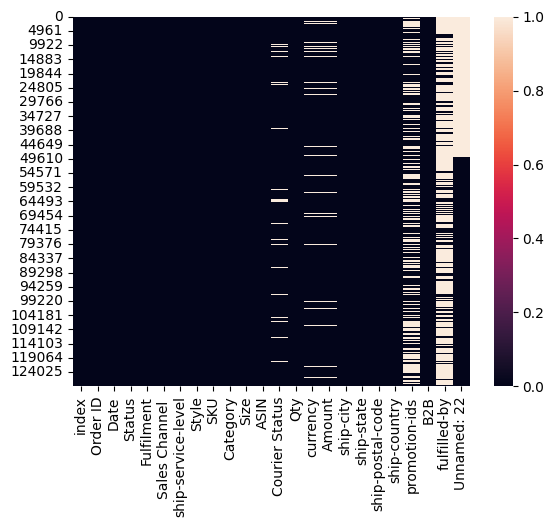

In [7]:
#Locate the null values 
sns.heatmap(df.isnull())

<h2><span style="color:blue">DATA CLEANING</span>

In [8]:
df = df.drop(columns=["index","Fulfilment","Sales Channel ", "ship-service-level","currency", "ship-country","fulfilled-by","Unnamed: 22"])

<h4><span style="color:black">Drop Columns and Rows</span>

In [9]:
#Drop rows where orderquantity is 0
df= df[(df['Qty'] != 0)]

In [10]:
#Remove March Values for Q2022 analysis
df = df[df["Date"].dt.month!=3]
df

,Order ID,Date,Status,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,2022-04-30,Shipped,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
4,407-1069790-7240320,2022-04-30,Shipped,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,CHENNAI,TAMIL NADU,600073.0,NaN,False
5,404-1490984-4578765,2022-04-30,Shipped,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
6,408-5748499-6859555,2022-04-30,Shipped,J0095,J0095-SET-L,Set,L,B08CMHNWBN,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.0,HYDERABAD,TELANGANA,500013.0,NaN,False
128971,402-9551604-7544318,2022-05-31,Shipped,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.0,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,407-9547469-3152358,2022-05-31,Shipped,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.0,HYDERABAD,TELANGANA,500049.0,NaN,False
128973,402-6184140-0545956,2022-05-31,Shipped,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.0,Halol,Gujarat,389350.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [11]:
#Document canceled and retruned orders before dropping these rows
cancelled_orders = len(df[df['Status'].isin(['Cancelled', 'Shipped - Lost in Transit'])])
returned_orders = len(df[df['Status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Damaged'])])
total_cancelled_returned = cancelled_orders + returned_orders
percent_cancelled = cancelled_orders / len(df) * 100
percent_returned = returned_orders / len(df) * 100
percent_cancelled_returned = total_cancelled_returned / len(df) * 100

In [12]:
df= df[(df['Status'] != "Cancelled")]
df= df[(df['Status'] != "Shipped - Returned to Seller")]
df= df[(df['Status'] != "Shipped - Returning to Seller")]
df= df[(df['Status'] != "Shipped - Damaged")]
df= df[(df['Status'] != "Shipped - Rejected by Buyer")]

<h4><span style="color:black">Drop Duplicates</span>

In [13]:
#View duplicate orders
df[df.duplicated("Order ID", keep=False)].head(5)

,Order ID,Date,Status,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
37,403-4367956-2849158,2022-04-30,Shipped,JNE3787,JNE3787-KR-S,kurta,S,B09RKBXM5B,Shipped,1,487.0,NEW DELHI,DELHI,110092.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
38,403-4367956-2849158,2022-04-30,Shipped,JNE3543,JNE3543-KR-S,kurta,S,B08HHJP41L,Shipped,1,368.0,NEW DELHI,DELHI,110092.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
61,404-2262140-4696366,2022-04-30,Shipped,JNE2270,JNE2270-KR-487-A-M,kurta,M,B07H7FZD32,Shipped,1,518.0,NAGPUR,MAHARASHTRA,440022.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
62,404-2262140-4696366,2022-04-30,Shipped,JNE3579,JNE3579-KR-M,kurta,M,B08QGK2BS2,Shipped,1,295.0,NAGPUR,MAHARASHTRA,440022.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
79,408-4069830-3819562,2022-04-30,Shipped,SET288,SET288-KR-NP-XXXL,Set,3XL,B09M6STTBC,Shipped,1,684.0,Kolkata,WEST BENGAL,700048.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [14]:
#Drop duplicates (in this case those with the same Order ID AND ASIN)
df = df.drop_duplicates(["Order ID","Style"])

<h4><span style="color:black">Filling Null Values</span>

In [15]:
#View the shipping status for orders with a null 'Amount' value 
print(df.Amount.isnull().sum())
df[df['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

123


Shipped     93.50%
Shipping     6.50%
Name: Status, dtype: object

In [16]:
#Filling null values
df["Courier Status"].fillna("unknown",inplace=True)
df["promotion-ids"].fillna("no promotion",inplace=True)
df["Amount"] = df["Amount"].fillna(0)
df['ship-city'] = df['ship-city'].fillna('unknown')
df['ship-state'] = df['ship-state'].fillna('unknown')
df['ship-postal-code'] = df['ship-postal-code'].fillna('unknown')
#Double check for null values
df.isnull().sum()

Order ID            0
Date                0
Status              0
Style               0
SKU                 0
Category            0
Size                0
ASIN                0
Courier Status      0
Qty                 0
Amount              0
ship-city           0
ship-state          0
ship-postal-code    0
promotion-ids       0
B2B                 0
dtype: int64

In [17]:
#Drop orders where the amount$ is 0
df= df[(df['Amount'] != 0)]

<h4><span style="color:black">Renaming Columns</span>

In [18]:
renamed_columns = {'Order ID':'order_ID', 'Date':'date', 'Status':'ship_status','Fulfilment':'fullfilment','ship-service-level': 
          'service_level', 'Style':'style', 'SKU':'sku', 'Category':'product_category','Size':'size', 'ASIN':'asin', 'Courier Status':
          'courier_ship_status', 'Qty':'order_quantity','Amount':'order_amount$','ship-city':'city', 'ship-state':'state', 
          'ship-postal-code':'zip', 'promotion-ids':'promotion','B2B':'customer_type'}

In [19]:
df = df.rename(columns=renamed_columns)

<h4><span style="color:black">Convert INR to USD</span><span style="color:green">$</span>

In [20]:
exchange_rate= .012
df["order_amount$"] = df["order_amount$"]*exchange_rate

<h4><span style="color:black">Convert B2B Values</span>

In [21]:
df["customer_type"] = df['customer_type'].replace(to_replace=[True,False],value=['business','customer'])
#df["customer_type"] = df["customer_type"].apply(lambda x: str(x).replace("False","customer").replace("True","business"))

<h4><span style="color:black">Adding a Month Column</span>

In [22]:
#Confirm remaining months
df["date"].dt.month.unique()

array([4, 5, 6], dtype=int64)

In [23]:
#Create a month column
df["month"] = df["date"].dt.month.replace(to_replace=[4,5,6], value=["april","may","june"])
df["month"].unique()

array(['april', 'may', 'june'], dtype=object)

In [24]:
#Verify the range of dates in the dataframe 
print(f'The earliest date in the dataframe is {df["date"].min()}')
print(f'The latest date in the dataframe is {df["date"].max()}')

The earliest date in the dataframe is 2022-04-01 00:00:00
The latest date in the dataframe is 2022-06-29 00:00:00


<h2><span style="color:blue">Insights</span>

In [25]:
revenue_by_month = df.groupby('month')['order_amount$'].sum()
percent_decrease_apr_to_may = (revenue_by_month['april'] - revenue_by_month['may']) / revenue_by_month['april'] * -100
percent_decrease_may_to_jun = (revenue_by_month['may'] - revenue_by_month['june']) / revenue_by_month['may'] * -100
Q2022_change = (revenue_by_month['april'] - revenue_by_month['june']) / revenue_by_month['april'] * -100
print(f"Total revenue for April 2022: ${revenue_by_month['april']:,.0f}")
print(f"Total revenue for May 2022: ${revenue_by_month['may']:,.0f}, which is a {percent_decrease_apr_to_may:.2f}% decrease from April.")
print(f"Total revenue for June 2022: ${revenue_by_month['june']:,.0f}, which is a {percent_decrease_may_to_jun:.2f}% decrease from May.")
print(f"Total revenue from Arpil to June decreased by {Q2022_change:.2f}%")
print("\n")

revenue_by_category = df.groupby('product_category')['order_amount$'].sum().sort_values(ascending=False)
print("Total revenue by product category:")
print(revenue_by_category.apply(lambda x: "${:,.0f}".format(x)))
print("\n")

percent_revenue_by_category = ((revenue_by_category/revenue_by_category.sum())*100).apply(lambda x: '{:.2f}%'.format(x))
print("Percentage of revenue by product category:")
print(percent_revenue_by_category)
print("\n")

avg_price_by_category = df.groupby('product_category')['order_amount$'].mean().sort_values(ascending=False)
print("Top 5 product categories by average price:")
print(avg_price_by_category.head(5))
print("\n")

monthly_order_data = df.groupby(pd.Grouper(key='date', freq='M')).agg({'mean'})
print(monthly_order_data)
print("\n")

print(f"Total cancelled orders: {cancelled_orders}, which is {percent_cancelled:.2f}% of all orders.")
print(f"Total returned orders: {returned_orders}, which is {percent_returned:.2f}% of all orders.")
print(f"This represents {percent_cancelled_returned:.2f}% of all orders.")
print("\n")

popular_category_by_state = df.groupby(['state', 'product_category'])['order_quantity'].sum().reset_index().sort_values(['state', 'order_quantity'], ascending=[True, False])
popular_category_by_state = popular_category_by_state.drop_duplicates(subset=['state'])
print("Most popular product category in each state:")
print(popular_category_by_state)
print("\n")

avg_order_amount_by_customer_type = df.groupby('customer_type')['order_amount$'].mean()
print("Average order amount by customer type:")
print(avg_order_amount_by_customer_type.apply(lambda x: "${:,.2f}".format(x)))

Total revenue for April 2022: $306,794
Total revenue for May 2022: $280,522, which is a -8.56% decrease from April.
Total revenue for June 2022: $251,812, which is a -10.23% decrease from May.
Total revenue from Arpil to June decreased by -17.92%


Total revenue by product category:
product_category
Set              $418,223
kurta            $227,710
Western Dress    $118,884
Top               $57,804
Ethnic Dress       $8,633
Blouse             $4,910
Bottom             $1,589
Saree              $1,364
Dupatta               $11
Name: order_amount$, dtype: object


Percentage of revenue by product category:
product_category
Set              49.84%
kurta            27.14%
Western Dress    14.17%
Top               6.89%
Ethnic Dress      1.03%
Blouse            0.59%
Bottom            0.19%
Saree             0.16%
Dupatta           0.00%
Name: order_amount$, dtype: object


Top 5 product categories by average price:
product_category
Set              10.249810
Saree             9.676255
W

           order_quantity order_amount$
                     mean          mean
date                                   
2022-04-30       1.003301      7.671768
2022-05-31       1.003071      8.126348
2022-06-30       1.003388      8.125066


Total cancelled orders: 5632, which is 4.85% of all orders.
Total returned orders: 2106, which is 1.82% of all orders.
This represents 6.67% of all orders.


Most popular product category in each state:
                  state product_category  order_quantity
0    ANDAMAN & NICOBAR               Set              94
11       ANDHRA PRADESH            kurta            2088
12                   AR              Top               1
15    ARUNACHAL PRADESH              Set              49
22                ASSAM              Set             574
..                  ...              ...             ...
308              orissa              Set               1
309              punjab              Set               7
314           rajasthan              Top  

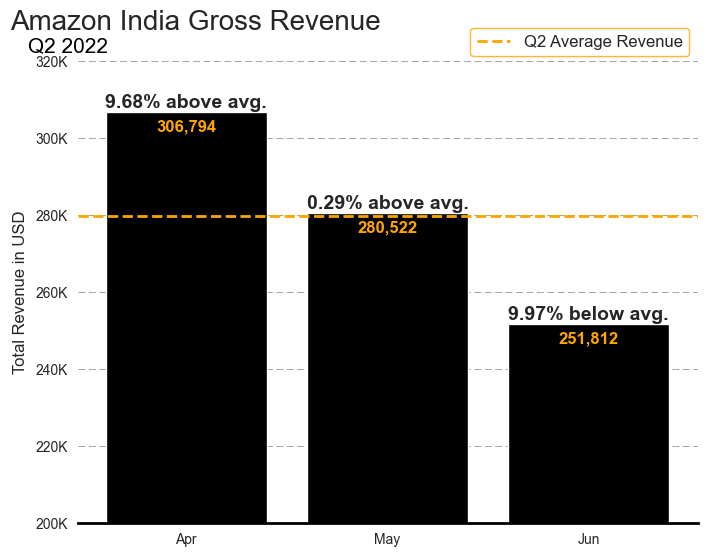

In [26]:
sns.set_style('whitegrid')

# Group the data by month and calculate the total sales revenue
monthly_sales = df.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount$': 'sum'})

# Get average quarterly revenue
avg_quarterly_revenue = monthly_sales.mean().iloc[0]

# Plot the monthly sales revenue
fig, ax = plt.subplots(figsize=(8, 6))
rev_bars = ax.bar(monthly_sales.index.strftime('%b'), monthly_sales['order_amount$'], color='black')

#Add labels above each bar
for i, bar in enumerate(rev_bars):
    if i !=0:
        continue
    april_sales = monthly_sales.iloc[0,0]
    pct_below_avg_rev = round((1 - (april_sales / avg_quarterly_revenue)) * -100, 2)
    ax.annotate(f'{pct_below_avg_rev}% above avg.', 
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), fontweight='bold', ha='center', va='bottom', fontsize=14)
for i, bar in enumerate(rev_bars):
    if i !=1:
        continue
    may_sales = monthly_sales.iloc[1,0]
    pct_below_avg = round((1 - (may_sales / avg_quarterly_revenue)) * -100, 2)
    ax.annotate(f'{pct_below_avg}% above avg.', 
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), fontweight='bold', ha='center', va='bottom', fontsize=14)
    
for i, bar in enumerate(rev_bars):
    if i != 2:
        continue
    june_sales = monthly_sales.iloc[2,0]
    pct_below_avg = round((1 - (june_sales / avg_quarterly_revenue)) * 100, 2)
    ax.annotate(f'{pct_below_avg}% below avg.', 
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), fontweight='bold', ha='center', va='bottom', fontsize=14)

#Display the order amount sum on each bar 
for bar in ax.patches:
    ax.annotate(format(bar.get_height(),',.0f'),(bar.get_x() + bar.get_width()/2, bar.get_height()-5000), fontweight='bold', 
    ha='center', fontsize=12, color="Orange")

#Display the average monthly revenue for the quarter
plt.axhline(avg_quarterly_revenue, linestyle='--', color='orange',linewidth=2,label='Q2 Average Revenue')
plt.legend(bbox_to_anchor=(1,1.09), fontsize=12, edgecolor="orange")

#Add titles, change range of Y axis, clean up display
ax.set_title('Amazon India Gross Revenue', fontsize=20, x=.19, y=1.05)
ax.text(-.08,1.02,'Q2 2022', fontsize=15, color='black', transform=ax.transAxes)
#transAxes so that (1,1) is top right of graph
ax.set_ylim(200000,320000)
ylabels = ['{:.0f}'.format(y) + 'K' for y in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)
ax.set_ylabel('Total Revenue in USD', fontsize=12, labelpad=5)

ax.yaxis.grid(linestyle='--', color='gray', linewidth=.5, dashes=(10,5))
ax.xaxis.grid(False)

# Remove top and right spines
def set_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['bottom'].set_color('black')

ax = set_spines(ax)
plt.show()

fig.savefig('grossrv.png', dpi=300)

<h4><span style="color:blue">Monthly Average Order Value</span>

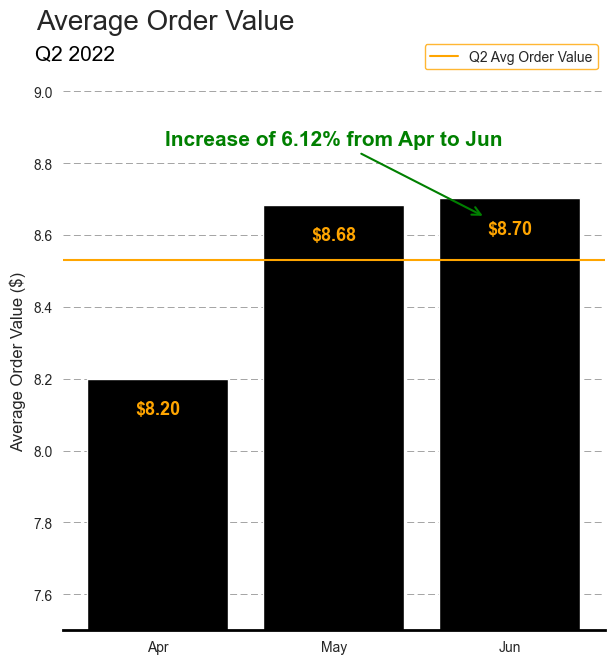

In [27]:
#create a dataframe for monthly average order 
monthly_aov = df.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount$': 'sum', 'order_ID': 'nunique'})
monthly_aov["average_order_value"] = monthly_aov["order_amount$"]/monthly_aov["order_ID"]

#Barplot for average order value by month
fig1, ax1= plt.subplots(figsize=(7,7))
maov_bars = ax1.bar(monthly_aov.index.strftime("%b"), monthly_aov["average_order_value"], color='black')

for bar in ax1.patches:
    ax1.annotate(f'${format(bar.get_height(),".2f")}',xy=(bar.get_x()+bar.get_width()/2,bar.get_height()-.1),fontweight='bold',ha="center",
    fontsize=13, color="orange")

#Annotate % change on graph
pct_change_apr_to_june = (monthly_aov.iloc[2,2]-monthly_aov.iloc[0,2])/monthly_aov.iloc[0,2]*100
ax1.annotate(f'Increase of {pct_change_apr_to_june:.2f}% from Apr to Jun',fontweight='bold', xy=(1.86,8.65), xytext=(1, 8.85), 
            fontsize=15, color="green",ha='center',arrowprops=dict(arrowstyle='->', color='green', lw=1.5))

plt.axhline(monthly_aov["average_order_value"].mean(),label="Q2 Avg Order Value",color="orange")
plt.legend(bbox_to_anchor=(1,1.1), edgecolor="orange")

#Add titles, change range of Y axis, clean up display
ax1.set_title('Average Order Value', fontsize=20, x=.19, y=1.1)
ax1.text(-.05,1.06,'Q2 2022', fontsize=15, color='black', transform=ax1.transAxes)
#transAxes so that (1,1) is top right of graph
ax1.set_ylabel('Average Order Value ($)', fontsize=12, labelpad=5)
ax1.set_ylim(7.50, 9.0)

ax1.yaxis.grid(linestyle='--', color='gray', linewidth=.5, dashes=(10,5))
ax1.xaxis.grid(False)

# Remove top and right spines
ax1 = set_spines(ax1)


<h4><span style="color:blue">Top Revenue by Product</span>

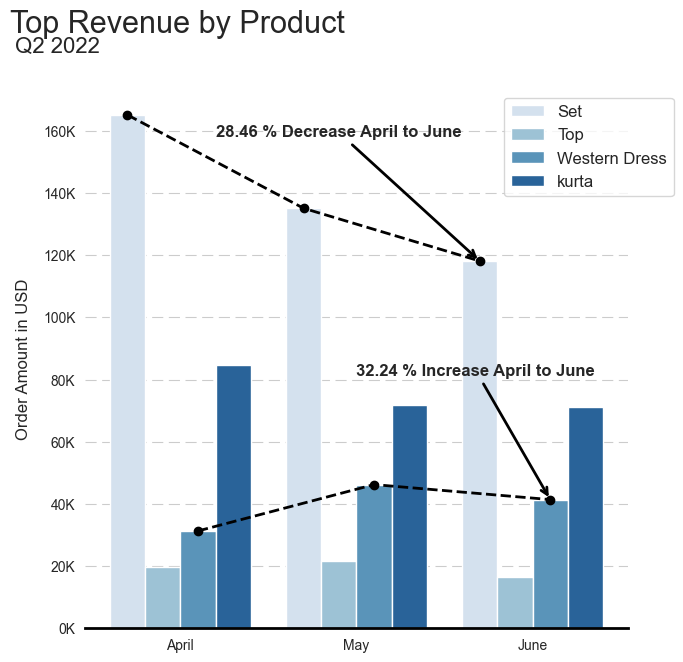

In [28]:
#Plotting gross revenue by product 
fig2, ax2 = plt.subplots(figsize=(7,7))
top_sales = df[df["product_category"].isin(["Set", "kurta",	"Western Dress", "Top"])]

#Use pd.Categorical to organize the order of months 
month_order = ["April", "May", "June"]
top_rbp = top_sales.groupby(["month","product_category"])["order_amount$"].sum().reset_index()
top_rbp["month"] = top_rbp["month"].str.capitalize()
top_rbp['month'] = pd.Categorical(top_rbp['month'], categories=month_order, ordered=True)

ax2 = sns.barplot(x='month', y='order_amount$', hue='product_category', data=top_rbp, palette= "Blues")

#Highlight WD sales and annotate 
wd_sales = top_rbp[top_rbp["product_category"] == "Western Dress"].reset_index(drop=True)
wd_sales.sort_values(by="month", inplace=True)

ax2.plot((.1,1.1,2.1), wd_sales["order_amount$"], color="black", linestyle= '--', linewidth=2, marker= "o")

wd_pct_increase = (wd_sales.iloc[2,2]- wd_sales.iloc[0,2])/wd_sales.iloc[0,2]*100
ax2.annotate((f"{wd_pct_increase:.2f} % Increase April to June"), xy=(2.1, wd_sales.iloc[2,2]), xytext= (1,wd_sales.iloc[2,2]+40000), fontweight="bold",
             fontsize= 12, arrowprops=dict(arrowstyle="->", color="black", linewidth=2))

#Highlight Set sales 
set_sales = top_rbp[top_rbp["product_category"] == "Set"].reset_index(drop=True)
set_sales.sort_values(by="month", inplace=True)

ax2.plot((-.3,.7,1.7), set_sales["order_amount$"], color="black", linestyle= '--', linewidth=2, marker= "o")

set_pct_decrease = (set_sales.iloc[0,2]- set_sales.iloc[2,2])/set_sales.iloc[0,2]*100
ax2.annotate((f"{set_pct_decrease:.2f} % Decrease April to June"), xy=(1.7, set_sales.iloc[2,2]), xytext= (0.2,set_sales.iloc[2,2]+40000), fontweight="bold",
             fontsize= 12, arrowprops=dict(arrowstyle="->", color="black", linewidth=2))

ax2.set_title("Top Revenue by Product", fontsize=22, x=.17, y=1.09)
ax2.text(-.13,1.07, "Q2 2022", fontsize=16, transform=ax2.transAxes)

ax2.yaxis.grid(linestyle="--", dashes=(10,5))
ax2.xaxis.grid(False)

plt.legend(bbox_to_anchor=(1.1,1), fontsize=12)

ax2.set_ylabel("Order Amount in USD", fontsize=12, labelpad=9)
ax2.set_xlabel(None)

ylabels = ['{:.0f}'.format(y) + 'K' for y in ax2.get_yticks()/1000]
ax2.set_yticklabels(ylabels)

ax2 = set_spines(ax2)

<h4><span style="color:blue">Percent Revenue by Product</span>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


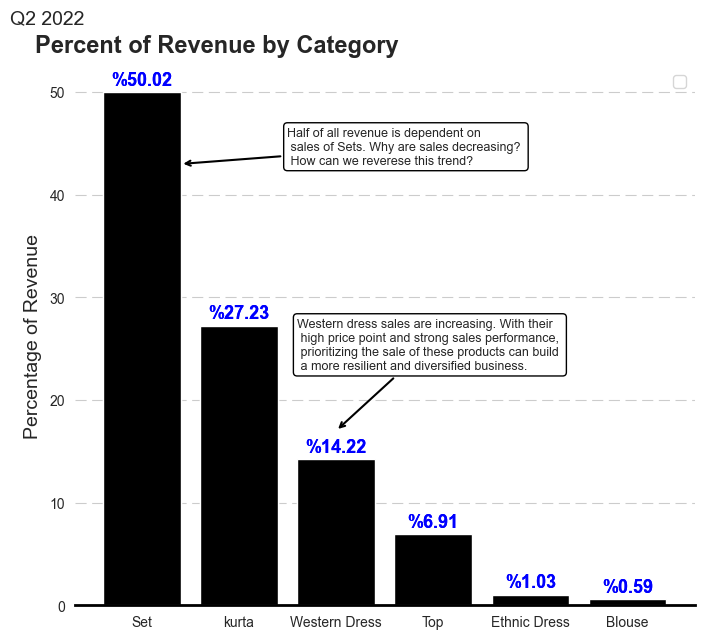

In [29]:
#Plot percent of revenue by product category 
fig3, ax3= plt.subplots(figsize=(8,7))

rev_by_cat= df.groupby("product_category")["order_amount$"].sum().sort_values()
included_categories=['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Blouse']
rev_by_cat = rev_by_cat.loc[included_categories]

total_revenue= rev_by_cat.sum() #Try df["order_amount$"].sum()
rev_by_pct = rev_by_cat/total_revenue*100 #Change if needed 

ax3 = sns.barplot(x=rev_by_pct.index, y=rev_by_pct.values, palette="Blues_d") #Change to a regular bar plot??
ax3.set_title("Percent of Revenue by Category", fontweight="bold", fontsize=17, x=.23, y=1.01)
ax3.text(-.1042,1.08,"Q2 2022", fontsize=14, transform= ax3.transAxes)

# Add the callout box to the plot
ax3.annotate("Western dress sales are increasing. With their \n high price point and strong sales performance, \n prioritizing the sale of these "
            "products can build \n a more resilient and diversified business.", xy=(2, 17), xytext=(1.6,23), fontsize=9, 
            arrowprops=dict(arrowstyle='->', color="black", linewidth=1.5), bbox=dict(boxstyle='round', facecolor="white", edgecolor="black"))

ax3.annotate("Half of all revenue is dependent on \n sales of Sets. Why are sales decreasing? \n How can we reverese this trend?", xy=(0.4, 43), xytext=(1.5,43), fontsize=9, 
            arrowprops=dict(arrowstyle='->', color="black", linewidth=1.5), bbox=dict(boxstyle='round', facecolor="white", edgecolor="black"))

ax3_bars = ax3.bar(rev_by_pct.index, rev_by_pct.values, color="Black") #delete?

for bar in ax3.patches:
    ax3.annotate(f'%{format(bar.get_height(),".2f")}',xy=(bar.get_x()+bar.get_width()/2,bar.get_height()+.7),fontweight='bold',ha="center",
    fontsize=13, color="Blue")

ax3.yaxis.grid(linestyle="--", dashes=(10,5))
ax3.xaxis.grid(False)

plt.legend(bbox_to_anchor=(1,1), fontsize=12)

ax3.set_ylabel("Percentage of Revenue", fontsize=14, labelpad=5)
ax3.set_xlabel(None)

ax3 = set_spines(ax3)


<h4><span style="color:blue">Sales by Size</span>

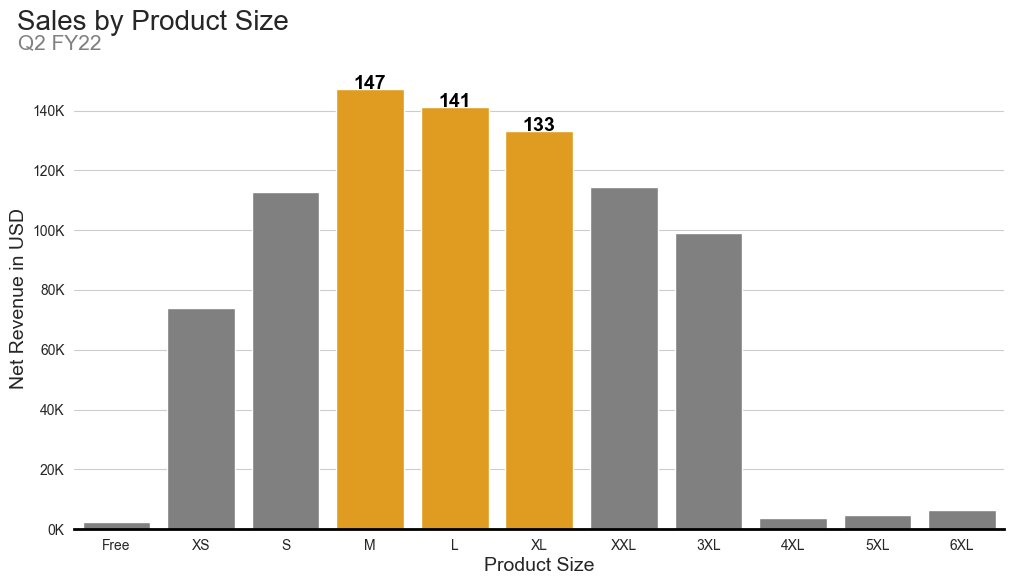

In [30]:
#Plot sales by size for advertising
size_order =["Free","XS","S","M","L","XL","XXL","3XL","4XL","5XL","6XL"]
df["size"] =pd.Categorical(df["size"], categories = size_order, ordered=True)

sales_by_size = df.groupby('size')['order_amount$'].sum()

# Create a horizontal bar chart to show the sales by product size
fig4, ax4 = plt.subplots(figsize=(12,6))

# Use a color palette to highlight specific sizes
palette_colors = ['orange' if size in ['XL', 'M', 'L'] else 'Grey' for size in sales_by_size.index]
sns.barplot(x=sales_by_size.index, y=sales_by_size.values, ax=ax4, palette=palette_colors)

# Set font sizes for x and y labels, title, and ticks
ax4.set_xlabel('Product Size', labelpad=3, fontsize=14)
ax4.set_ylabel('Net Revenue in USD', labelpad=3, fontsize=14)
ax4.set_title('Sales by Product Size', fontsize=20, x=0.085, y=1.05, pad=10)
ax4.text(-0.06, 1.04, 'Q2 FY22', fontsize=15, color='Grey', transform=ax4.transAxes)

# Set font sizes for the bars and add annotations for S, M, and L sizes
for i, size in enumerate(sales_by_size.index):
    if size in ['XL', 'M', 'L']:
        ax4.text(i, sales_by_size.values[i], f'{sales_by_size.values[i]/1000:.0f}' , ha='center', fontsize=14, fontweight='bold', color='black')
ylabels = ['{:.0f}'.format(y) + 'K' for y in ax4.get_yticks()/1000]
ax4.set_yticklabels(ylabels)

ax4 = set_spines(ax4)


<h4><span style="color:blue">Top Products by State for each Revenue Quartile</span>

Text(0.5, 0.98, 'Identifying Top 4 Products for States in each Revenue Quartile')

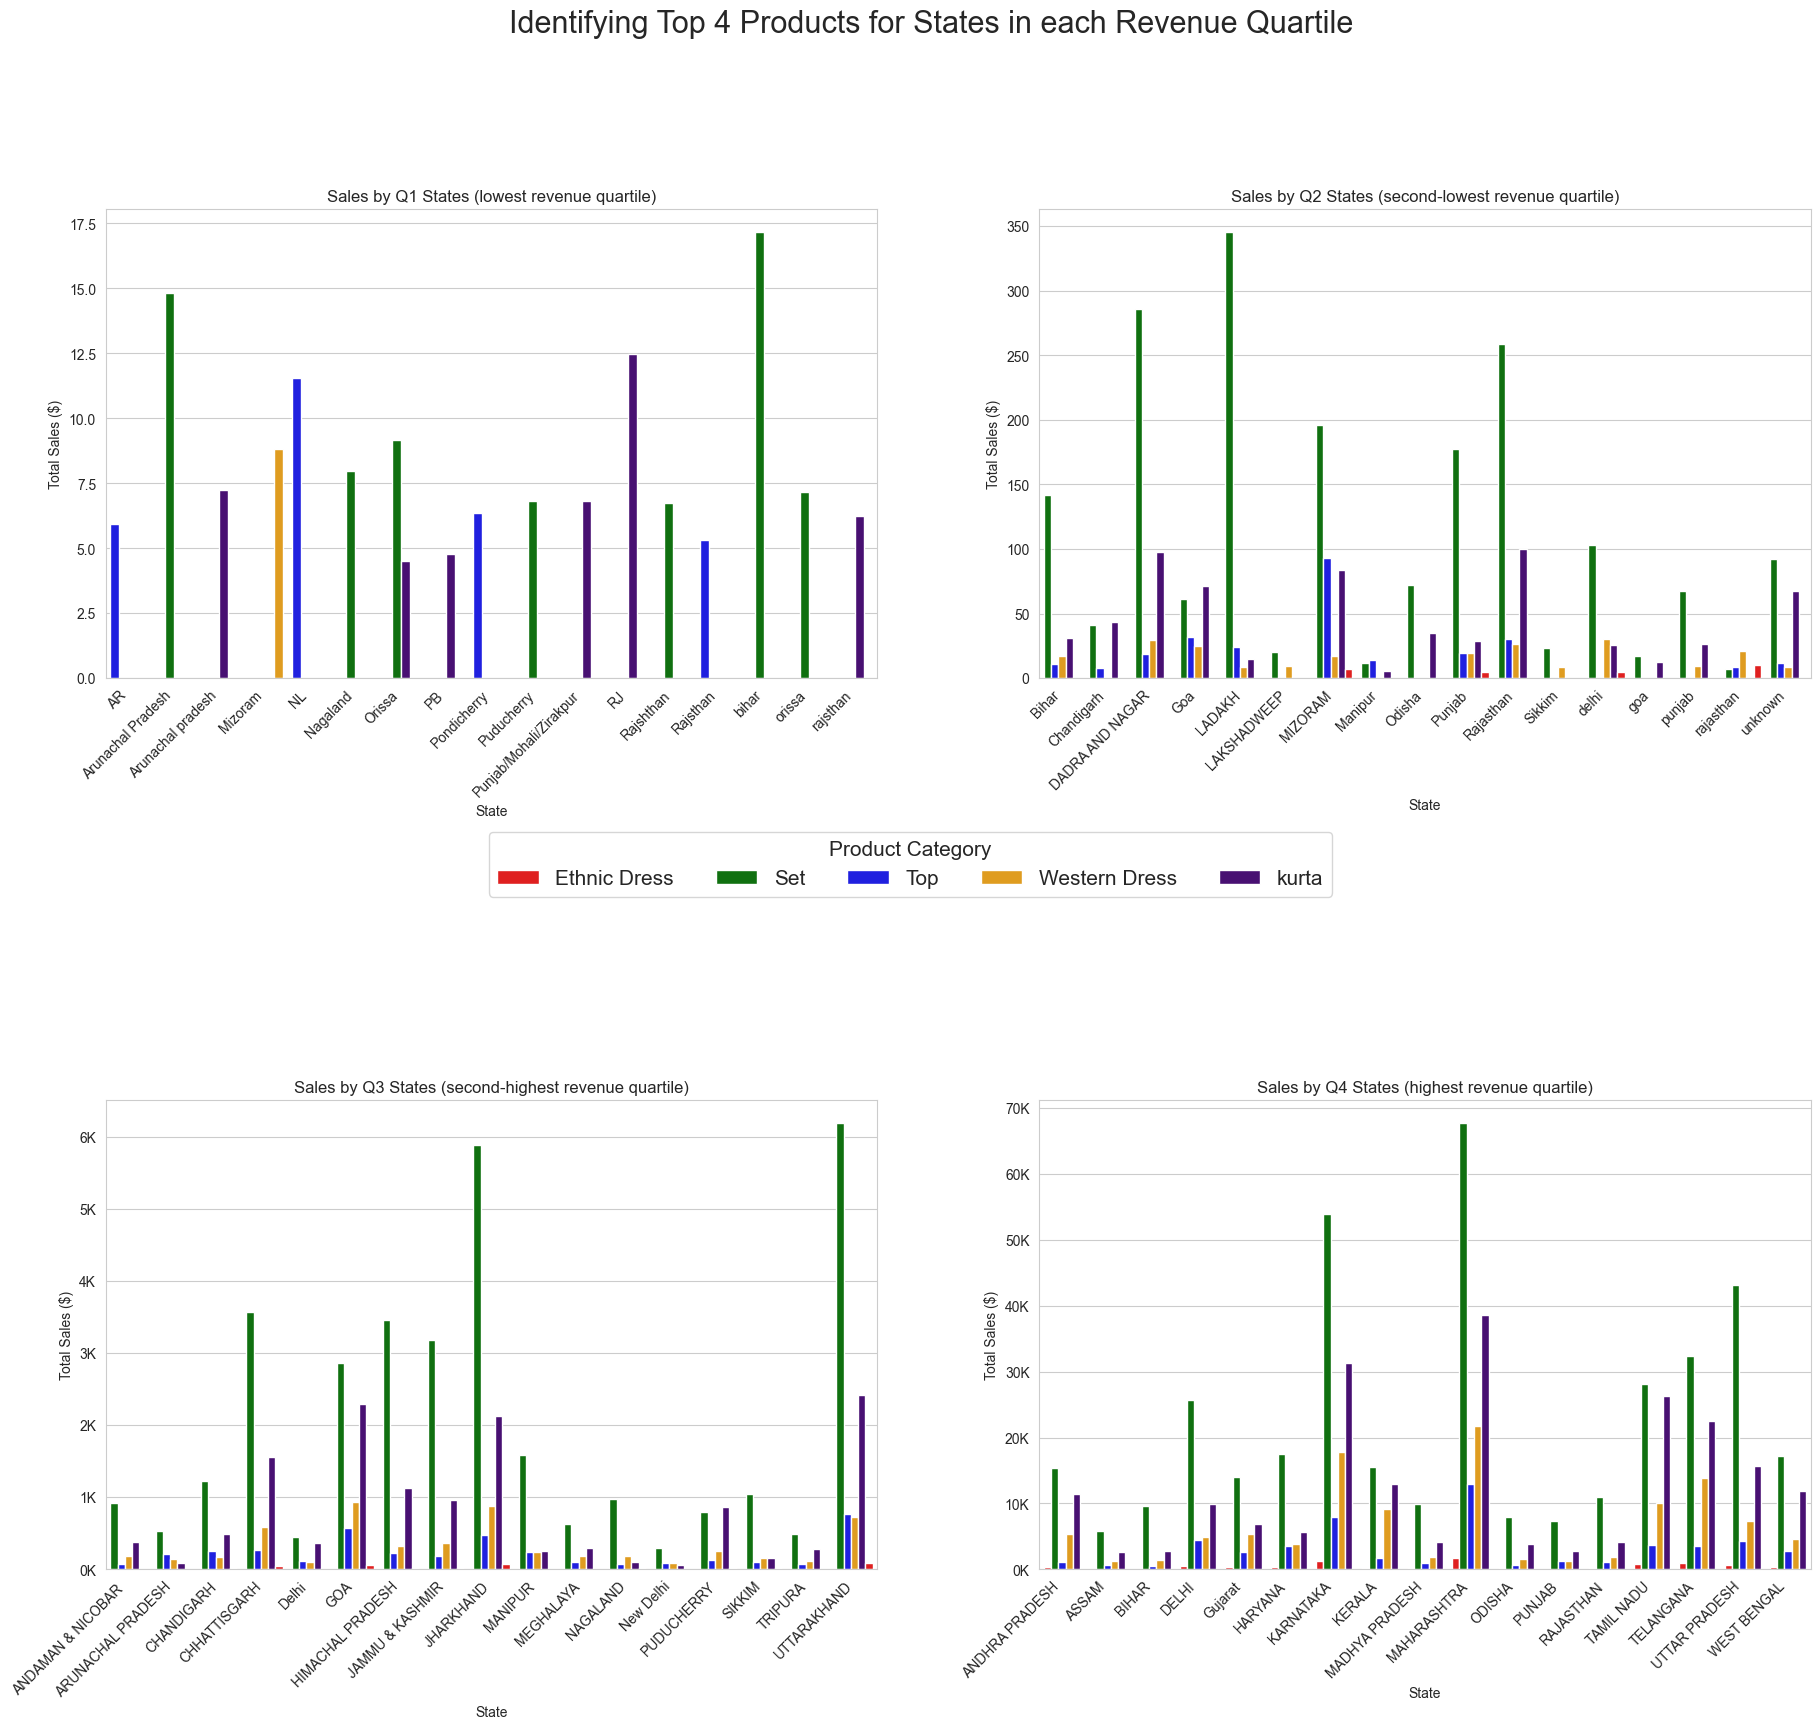

In [31]:
# Group the data by state and calculate the total sales
sales_by_state = df.groupby('state')['order_amount$'].sum()

# Get the top 5 and bottom 5 states by sales
n_states = len(sales_by_state)
quartiles = pd.qcut(sales_by_state, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
top_states = []
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    top_states += sales_by_state[quartiles == q].nlargest(17).index.tolist()

 # Filter the dataframe to include only the top states
top_sales = df[df['state'].isin(top_states)]

# Group the data by state and product, and calculate the total sales
sales_by_state_product = top_sales.groupby(['state', 'product_category'])['order_amount$'].sum().reset_index()

# Get the top 3 products for each quartile
top_products = []
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    top_products += sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == q].index)].groupby('state').apply(lambda x: x.nlargest(3, 'order_amount$'))['product_category'].tolist()

# Create a figure with four subplots
fig5, ax5 = plt.subplots(2, 2, figsize=(22, 20))
#Define the color palette for the product categories
colors = {'Top': 'blue', 'Set': 'green', 'kurta': 'indigo', 'Western Dress':'orange', "Ethnic Dress":"red"}

# Create the subplot for quartile 1
q1_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q1'].index)]
q1_sales = q1_sales[q1_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount$', hue='product_category', data=q1_sales, palette= colors, ax=ax5[0, 0])
ax5[0, 0].legend().set_visible(False)
ax5[0, 0].set_title('Sales by Q1 States (lowest revenue quartile)')
ax5[0, 0].set_xlabel('State')
ax5[0, 0].set_ylabel('Total Sales ($)')

# Create the subplot for quartile 2
q2_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q2'].index)]
q2_sales = q2_sales[q2_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount$', hue='product_category', data=q2_sales, palette=colors, ax=ax5[0, 1])
ax5[0, 1].legend().set_visible(False)
ax5[0, 1].set_title('Sales by Q2 States (second-lowest revenue quartile)')
ax5[0, 1].set_xlabel('State')
ax5[0, 1].set_ylabel('Total Sales ($)')

# Create the subplot for quartile 3
q3_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q3'].index)]
q3_sales = q3_sales[q3_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount$', hue='product_category', data=q3_sales, palette=colors, ax=ax5[1, 0])
ax5[1, 0].legend().set_visible(False)
ax5[1, 0].set_title('Sales by Q3 States (second-highest revenue quartile)')
ax5[1, 0].set_xlabel('State')
ax5[1, 0].set_ylabel('Total Sales ($)')
ylabels = ['{:.0f}'.format(y) + 'K' for y in ax5[1,0].get_yticks()/1000]
ax5[1,0].set_yticklabels(ylabels)

# Create the subplot for quartile 4
q4_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q4'].index)]
q4_sales = q4_sales[q4_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount$', hue='product_category', data=q4_sales, palette=colors, ax=ax5[1, 1])
ax5[1, 1].legend().set_visible(False)
ax5[1, 1].set_title('Sales by Q4 States (highest revenue quartile)')
ax5[1, 1].set_xlabel('State')
ax5[1, 1].set_ylabel('Total Sales ($)')
ylabels = ['{:.0f}'.format(y) + 'K' for y in ax5[1,1].get_yticks()/1000]
ax5[1,1].set_yticklabels(ylabels)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=.9, wspace=.21, bottom=.2)

# Rotate the x-axis tick labels
for ax5 in ax5.flat:
    plt.setp(ax5.get_xticklabels(), rotation=45, ha='right')

handles, labels = ax5.get_legend_handles_labels()
fig5.legend(handles, labels, loc='center', ncol=len(labels), title='Product Category', fontsize=15, title_fontsize = 15)

plt.suptitle("Identifying Top 4 Products for States in each Revenue Quartile", fontsize = 22)